![MLU Logo](../data/MLU_Logo.png)

# <a name="0">Machine Learning Accelerator - Computer Vision - Lecture 3</a>


## Object Detection with YOLO

In this notebook, we use pre-trained YOLO models for object detection task, with only a few
lines of code. Here are the topics for this notebook:

1. <a href="#1">Downloading a Pretrained Model</a>      
2. <a href="#2">Preprocessing an Image</a>
3. <a href="#3">Inference and Visualizating</a>
4. <a href="#4">Putting it all Together</a>
    

In [ ]:
! pip install -q -r ../requirements.txt

In [5]:
%matplotlib inline
import torch
from torch import nn
import torchvision
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import requests
import os

## 1. <a name="1">Downloading a Pretrained Model</a>
(<a href="#0">Go to top</a>)

Let's get a YOLOv3 model as the base model. It was trained on COCO dataset.

By specifying `pretrained=True`, it will automatically download the model and its weights from the PyTorch model zoo if necessary.

In [6]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8n.pt")

100%|██████████| 6.25M/6.25M [00:00<00:00, 116MB/s]


## 2. <a name="2">Pre-processing an Image</a>
(<a href="#0">Go to top</a>)

Next we load an image for inference. You can feed an arbitrarily sized image.

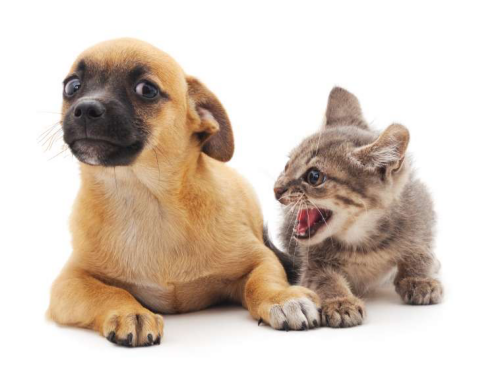

In [7]:
test_image = '../data/catdog.png'
im_fname = Image.open(test_image)
plt.imshow(im_fname)
plt.axis('off')
plt.show()

Then we make predictions using the trained model.

In [11]:

# Run batched inference on a list of images
result = model(test_image)

# # Process results attributes
boxes = result[0].boxes  # Boxes object for bounding box outputs


image 1/1 /home/ec2-user/SageMaker/MLU-Courses/github-repos/aws-machine-learning-university-accelerated-cv/notebooks/../data/catdog.png: 512x640 2 cats, 1 dog, 77.3ms
Speed: 2.7ms preprocess, 77.3ms inference, 1.3ms postprocess per image at shape (1, 3, 512, 640)


In [22]:
# Display the confidence probability of predicting the category displayed
boxes.conf

tensor([0.8482, 0.6674, 0.3376], device='cuda:0')

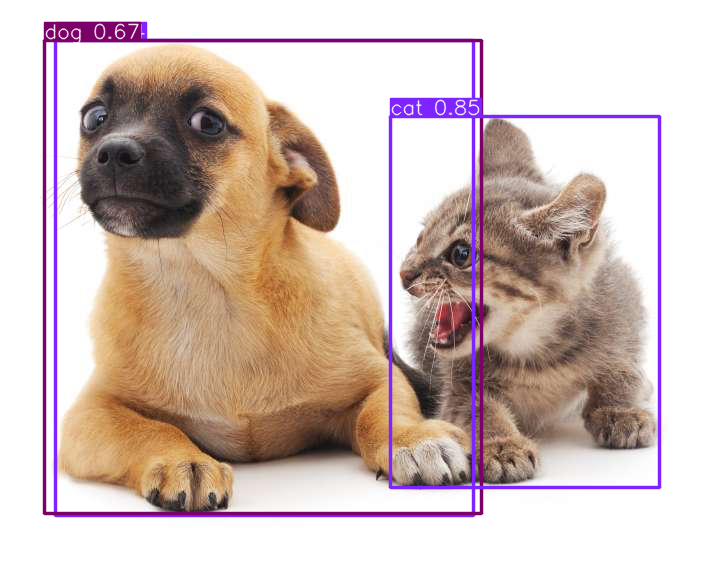

In [12]:
result[0].show()

## 4. <a name="4">Another Example</a>
(<a href="#0">Go to top</a>)

Let's load another real life example and make the prediction with the same YOLO model to verify its stability.


image 1/1 /home/ec2-user/SageMaker/MLU-Courses/github-repos/aws-machine-learning-university-accelerated-cv/notebooks/../data/bikedog.jpg: 480x640 1 bicycle, 1 car, 1 truck, 1 dog, 73.7ms
Speed: 2.2ms preprocess, 73.7ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


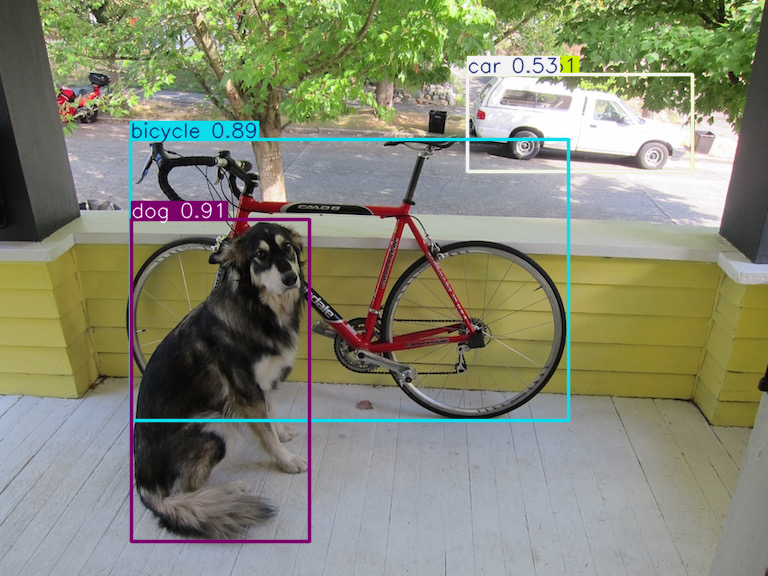

In [23]:
dog_bike = '../data/bikedog.jpg'

# Run batched inference on a list of images
result = model(dog_bike)
result[0].show()

Is the YOLO model inference simple and straightforward? If you want to learn more about object detection techniques, feel free to explore PyTorch's documentation and tutorials.